# Training a logistic regression model to predict whether or not particular internet user will click on an ad based off the features of that user.

## import and view the data (fake advertising data set)

In [1]:
import pandas as pd
ad_data = pd.read_csv("advertising.csv")

In [2]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [4]:
ad_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


## Exploratory Data Analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

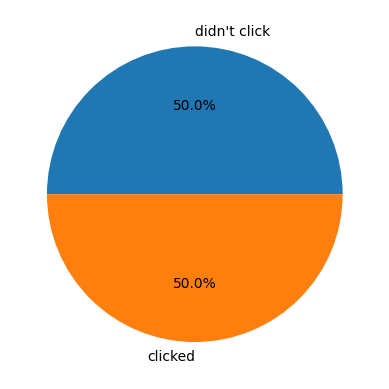

In [6]:
plt.pie(ad_data["Clicked on Ad"].value_counts(), labels=["didn't click", "clicked"], autopct='%1.1f%%')
plt.show()

balanced classes

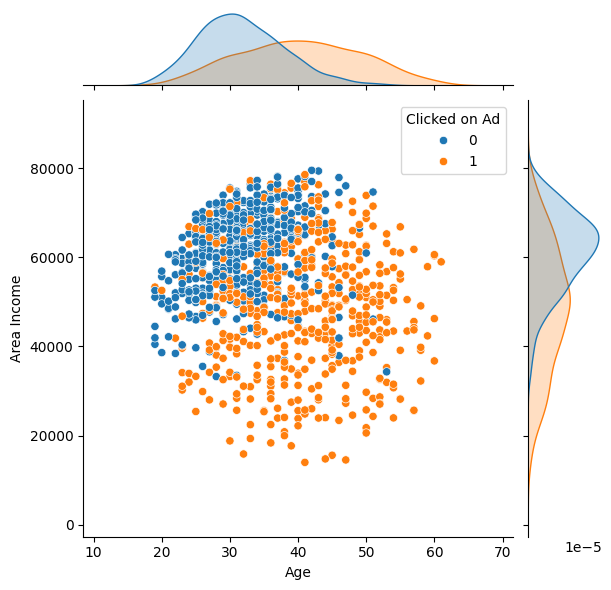

In [7]:
sns.jointplot(x="Age" , y="Area Income" , data=ad_data, hue="Clicked on Ad" )
plt.show()

we can see a strong correlation between are income, age and clicked on ad

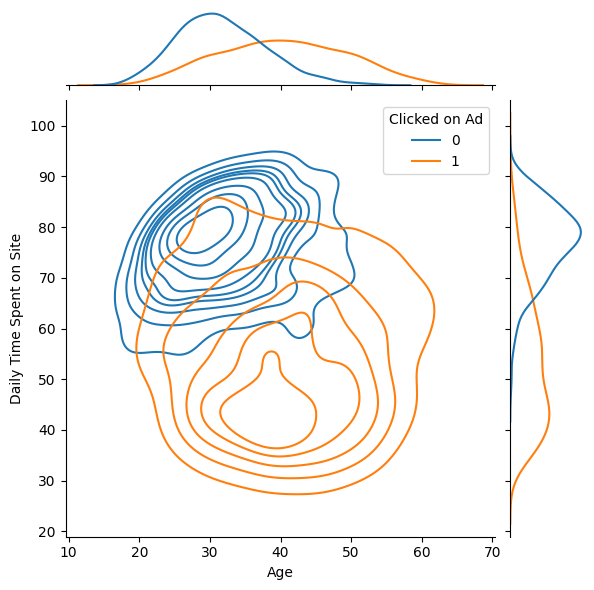

In [8]:
sns.jointplot(x="Age", y="Daily Time Spent on Site", data=ad_data, kind="kde", hue="Clicked on Ad")
plt.show()

we can see a strong correlation between are daily time spent on site, age and clicked on ad

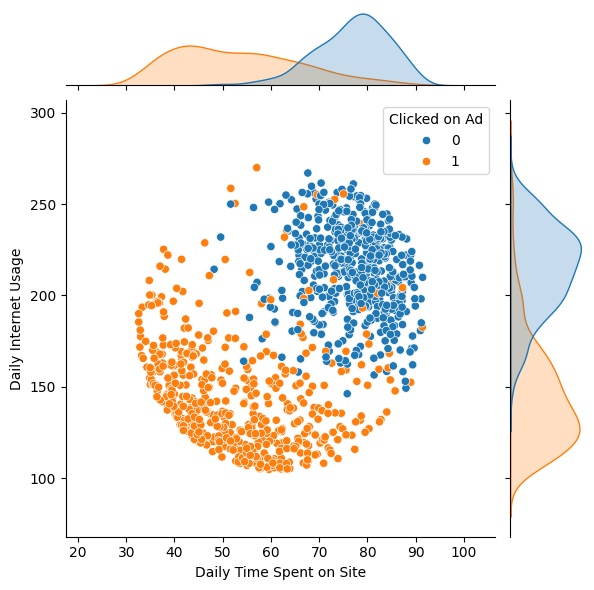

In [9]:
sns.jointplot(x="Daily Time Spent on Site", y="Daily Internet Usage", data=ad_data, kind="scatter", hue="Clicked on Ad")
plt.show()

a clear separation of clicked or not relative to the features daily internet usage and daily time on site

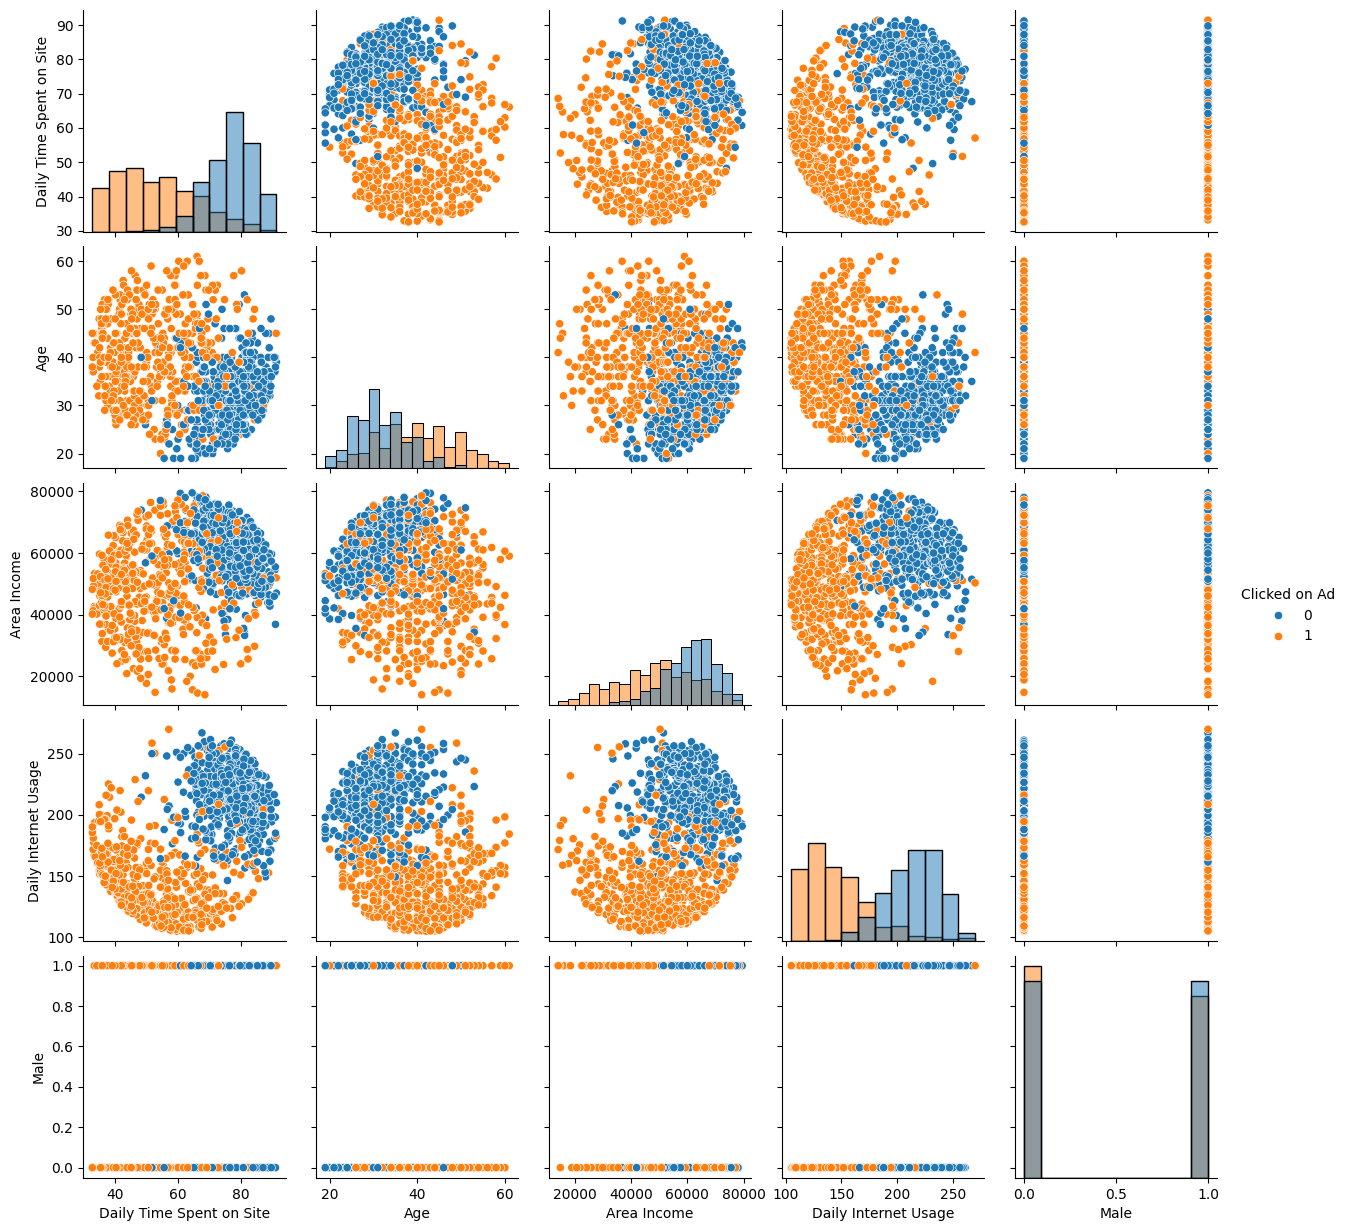

In [10]:
# view all features relations
sns.pairplot(ad_data, hue="Clicked on Ad", diag_kind="hist")
plt.show()

## Feature engineering and data preprocessing

In [11]:
# drop "Ad Topic Line","City","Country" duo to the small data set examples that the model will over fit on them
ad_data = ad_data.drop(["Ad Topic Line","City","Country"] , axis=1)

In [12]:
import numpy as np

# convert timestamp into datetime format
ad_data["Timestamp"] = pd.to_datetime(ad_data["Timestamp"])

# extract useful feature
ad_data["hour"] = ad_data["Timestamp"].dt.hour
ad_data["day"] = ad_data["Timestamp"].dt.day
ad_data["dayofweek"] = ad_data["Timestamp"].dt.dayofweek
ad_data["month"] = ad_data["Timestamp"].dt.month

# cycle encode hour data (without this the model will consider time 0 and time 23 are so far from each other)
ad_data["hour_sin"] = np.sin(2 * np.pi * ad_data["hour"] / 24)
ad_data["hour_cos"] = np.cos(2 * np.pi * ad_data["hour"] / 24)

# cycle encode week data
ad_data["dow_sin"] = np.sin(2 * np.pi * ad_data["dayofweek"] / 7)
ad_data["dow_cos"] = np.cos(2 * np.pi * ad_data["dayofweek"] / 7)

# cycle encode week data
ad_data["month_sin"] = np.sin(2 * np.pi * ad_data["month"] / 12)
ad_data["month_cos"] = np.cos(2 * np.pi * ad_data["month"] / 12)

ad_data.drop(columns=["Timestamp", "hour", "dayofweek", "month"], inplace=True)


In [13]:
x = ad_data.drop("Clicked on Ad", axis=1)
y = ad_data["Clicked on Ad"]

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, stratify=y)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## create and train the model

In [16]:

from sklearn.linear_model import LogisticRegression
LRr = LogisticRegression(max_iter=1000)

In [17]:
LRr.fit(x_train , y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

## evaluate the model

In [18]:
predicted_Y = LRr.predict(x_test)

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

print(recall_score(y_test , predicted_Y))
print(precision_score(y_test , predicted_Y))
print(accuracy_score(y_test , predicted_Y))

0.97
0.97
0.97
